## Outlier Removal Using IQR

#### Quartiles
##### Three points which devide the total data into four equal parts when it has been orderly arranged are kknown as Qurtiles.
##### Q1 --- First Quartile, Q2 --- Second Quartile, Q3 --- Third Quartile

### Interquartile Range [IQR]
#### The data range that contains the middle 50% of the entries

### IQR = Q3 - Q1

##### The values which is below Q1 - 1.5*IQR or above Q3 +1.5*IQR are outliers.
##### This is called the 1.5*IQR RULE

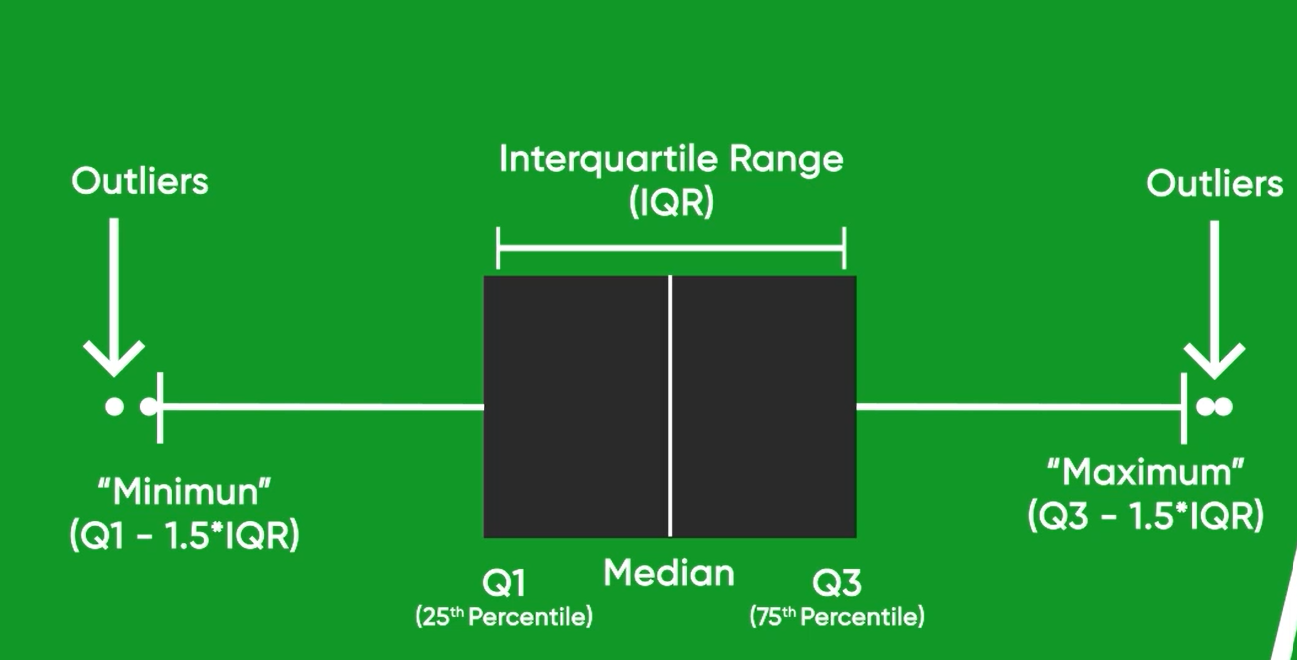

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("scholarship.csv")

In [15]:
df = data.copy()

In [16]:
df.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


C:\Users\pande\AppData\Local\Temp\ipykernel_25232\831898347.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["scholarship_exam_marks"])


<Axes: xlabel='scholarship_exam_marks', ylabel='Density'>

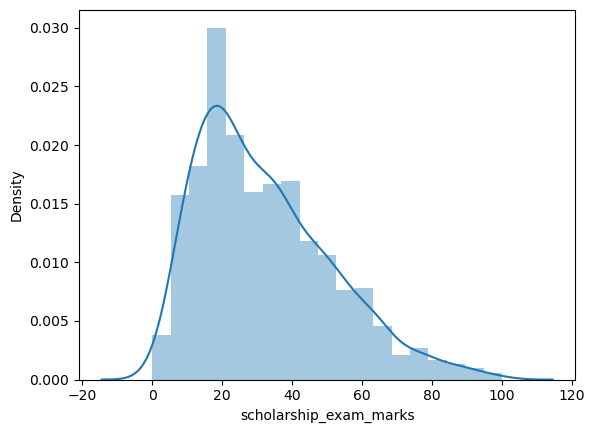

In [17]:
sns.distplot(df["scholarship_exam_marks"])

<Axes: ylabel='scholarship_exam_marks'>

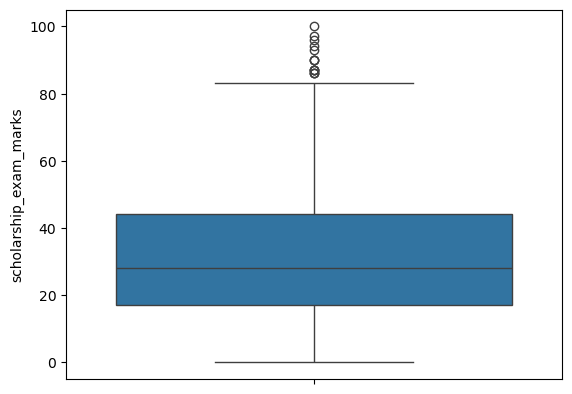

In [18]:
sns.boxplot(df["scholarship_exam_marks"])

In [19]:
# Finding Quartiles
Q1 = df["scholarship_exam_marks"].quantile(0.25)
Q3 = df["scholarship_exam_marks"].quantile(0.75)

In [20]:
Q1

np.float64(17.0)

In [21]:
Q3

np.float64(44.0)

In [22]:
IQR = Q3 - Q1

In [23]:
df.describe()

,semester_percentage,scholarship_exam_marks,got_scholarship
count,1000.000000,1000.000000,1000.000000
mean,69.612400,32.225000,0.489000
std,6.158979,19.130822,0.500129
min,48.900000,0.000000,0.000000
25%,65.500000,17.000000,0.000000
50%,69.600000,28.000000,0.000000
75%,73.700000,44.000000,1.000000
max,91.200000,100.000000,1.000000


In [29]:
min = Q1 - 1.5 * IQR
max = Q3 + 1.5 * IQR

In [30]:
min

np.float64(-23.5)

In [31]:
max

np.float64(84.5)

In [32]:
df[(data["scholarship_exam_marks"]<min) | (data["scholarship_exam_marks"]>max)]

,semester_percentage,scholarship_exam_marks,got_scholarship
9,77.5,94,1
40,66.0,86,1
61,75.1,86,0
134,63.3,93,0
162,78.0,90,0
283,70.9,87,0
290,83.8,87,0
311,69.7,87,1
324,66.4,90,0
630,65.6,96,1


### Trimming

In [33]:
df[(data["scholarship_exam_marks"]>min) & (data["scholarship_exam_marks"]<max)]

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
998,86.2,46,1


In [34]:
new_data = df[(data["scholarship_exam_marks"]>min) & (data["scholarship_exam_marks"]<max)]

C:\Users\pande\AppData\Local\Temp\ipykernel_25232\649811132.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["scholarship_exam_marks"])
C:\Users\pande\AppData\Local\Temp\ipykernel_25232\649811132.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data["scholarship_exam_marks"])


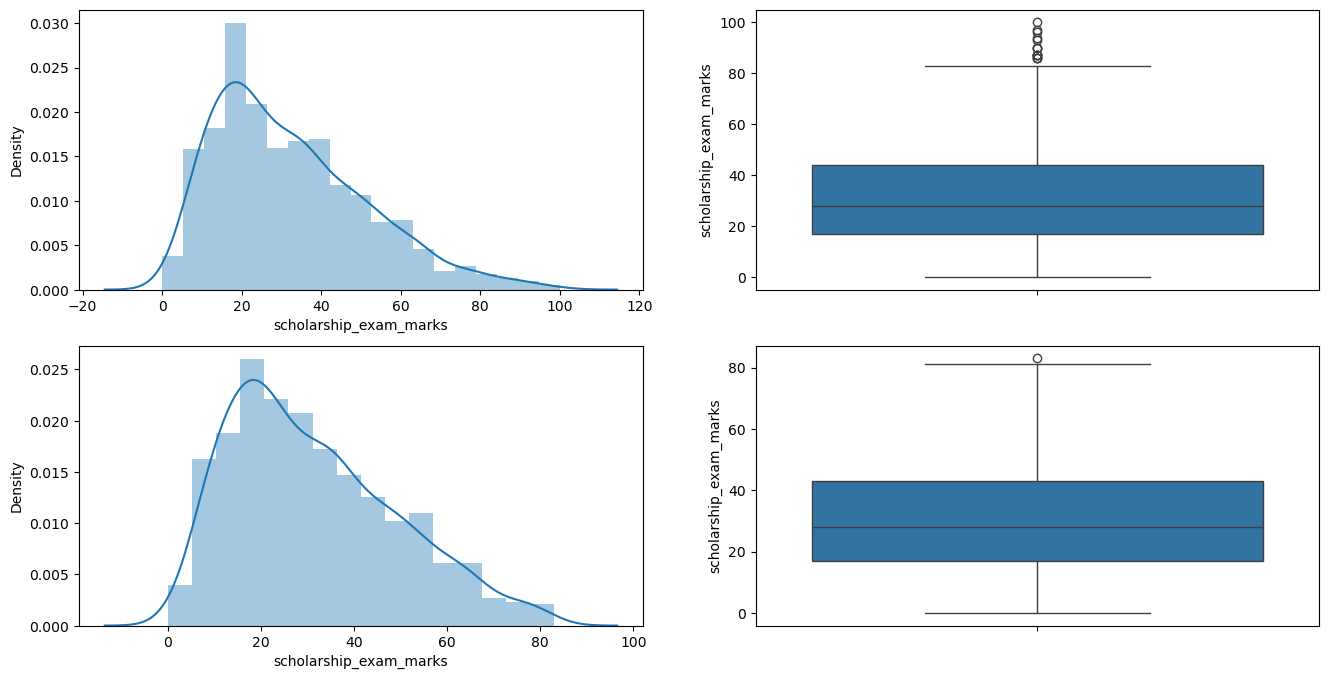

In [35]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df["scholarship_exam_marks"])

plt.subplot(2,2,2)
sns.boxplot(df["scholarship_exam_marks"])

plt.subplot(2,2,3)
sns.distplot(new_data["scholarship_exam_marks"])

plt.subplot(2,2,4)
sns.boxplot(new_data["scholarship_exam_marks"])

plt.show()

### Capping

In [36]:
df["scholarship_exam_marks"] = np.where(df["scholarship_exam_marks"] > max, max, np.where(df["scholarship_exam_marks"] <min,min,df["scholarship_exam_marks"]))

In [37]:
data.shape

(1000, 3)

<Axes: ylabel='scholarship_exam_marks'>

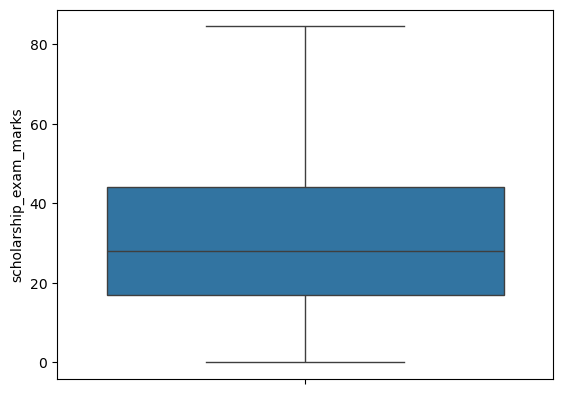

In [39]:
sns.boxplot(df["scholarship_exam_marks"])